# Introduction

Predicting Employee Leaving using Machine Learning

About Dataset: This dataset contains data of 300k employee who are working for an organisation. this dataseet contains features such as gender, Distance to the office, years worked, their previous salary and current, their personal review and supervisor's review

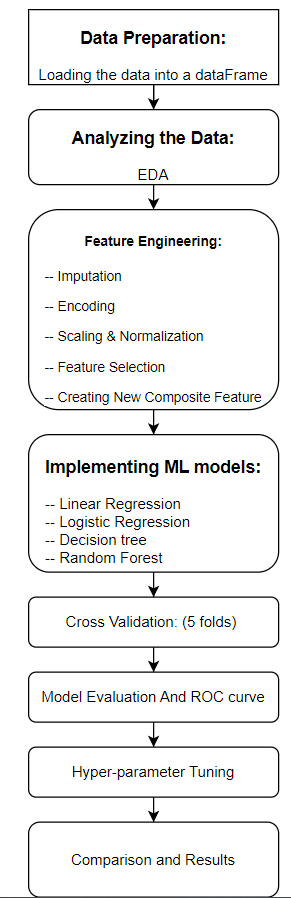

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/midterm/employee_departure_dataset.csv', encoding='latin-1')
df.head()

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left
0,0,1002332,1,>30miles,10,63K,65K,4.0,5.0,2,0
1,1,1002333,0,~10miles,7,54K,56K,4.0,4.0,2,0
2,2,1002334,0,<5mile,5,60K,61K,4.0,4.0,3,0
3,3,1002335,0,~15miles,4,59K,60K,5.0,5.0,7,0
4,4,1002336,1,~20miles,6,61K,63K,5.0,5.0,5,0


In [2]:
df.describe()

,Unnamed: 0,RecordId,Gender,YearsWorked,SelfReview,SupervisorReview,DepartmentCode,Left
count,300000.000000,3.000000e+05,300000.000000,300000.000000,299416.000000,299424.000000,300000.000000,300000.000000
mean,149999.500000,1.152332e+06,0.401043,7.003120,4.399084,4.101308,3.997480,0.231833
std,86602.684716,8.660268e+04,0.490111,1.867817,0.663330,0.943972,2.161085,0.422004
min,0.000000,1.002332e+06,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000
25%,74999.750000,1.077332e+06,0.000000,6.000000,4.000000,4.000000,2.000000,0.000000
50%,149999.500000,1.152332e+06,0.000000,7.000000,4.000000,4.000000,3.000000,0.000000
75%,224999.250000,1.227331e+06,1.000000,8.000000,5.000000,5.000000,6.000000,0.000000
max,299999.000000,1.302331e+06,1.000000,14.000000,5.000000,5.000000,7.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300000 non-null  int64  
 1   RecordId          300000 non-null  int64  
 2   Gender            300000 non-null  int64  
 3   Distance          299735 non-null  object 
 4   YearsWorked       300000 non-null  int64  
 5   PreviousSalary    300000 non-null  object 
 6   Salary            300000 non-null  object 
 7   SelfReview        299416 non-null  float64
 8   SupervisorReview  299424 non-null  float64
 9   DepartmentCode    300000 non-null  int64  
 10  Left              300000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 25.2+ MB


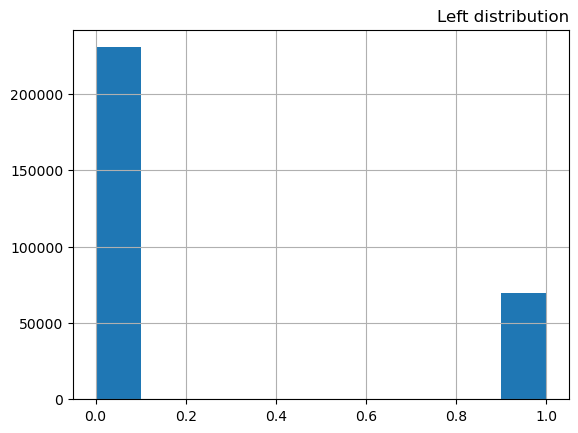

In [4]:
# Histogram plot for our target variable
df['Left'].hist()
plt.title('Left distribution', loc='right')
plt.show()

### From above histogram we came to know that our dataset is biased, it has almost 4 times data points of case '0' then that of '1'

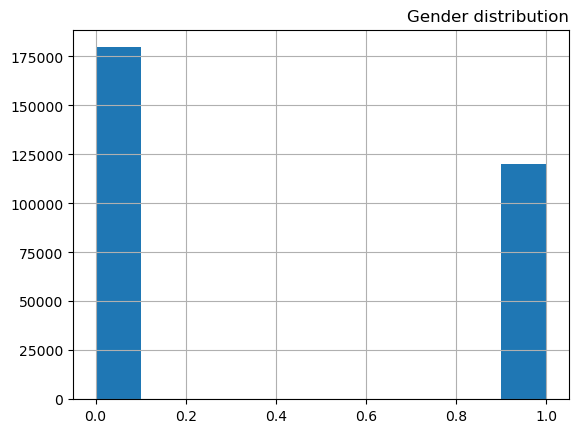

In [5]:
# histogram for gender distribution
df['Gender'].hist()
plt.title('Gender distribution', loc='right')
plt.show()

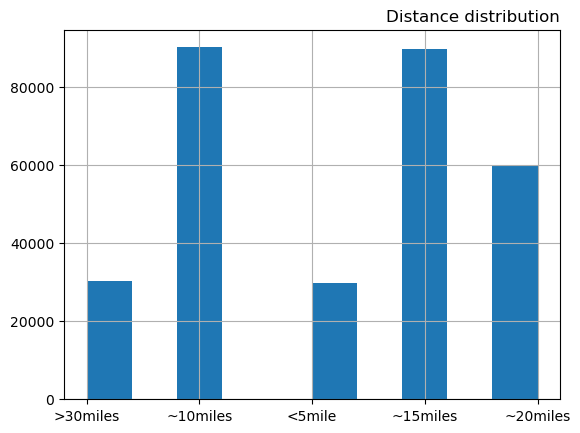

In [6]:
# histogram plotting for distance distribution
df['Distance'].hist()
plt.title('Distance distribution', loc='right')
plt.show()

### As Distance has only 5 categories, so we won't be converting it to numerical form. first we will observe our model performance then after evaluation we will consider do we need to convert it or not.

<Axes: xlabel='Distance', ylabel='count'>

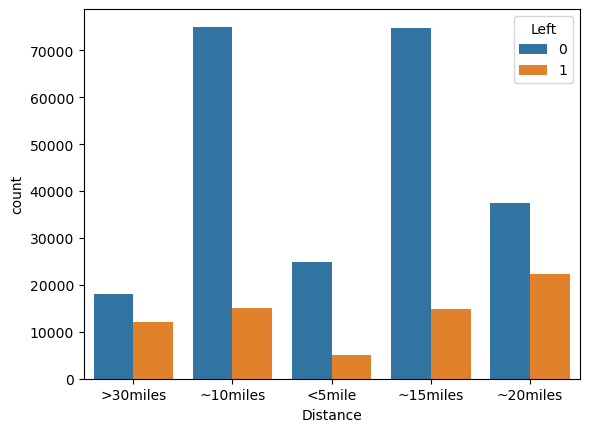

In [7]:
#plot to see any relation between Distance and target variable Left

import seaborn as sns

sns.countplot(data = df, x = 'Distance', hue = 'Left')

### Almost 50% people whoes distance is greater than 20 miles (~20 and > 30) has left the Job

In [8]:
# converting Salary and PreviousSalary to numeric

df['Salary'] = pd.to_numeric(df['Salary'].str[:2])
df['PreviousSalary'] = pd.to_numeric(df['PreviousSalary'].str[:2])

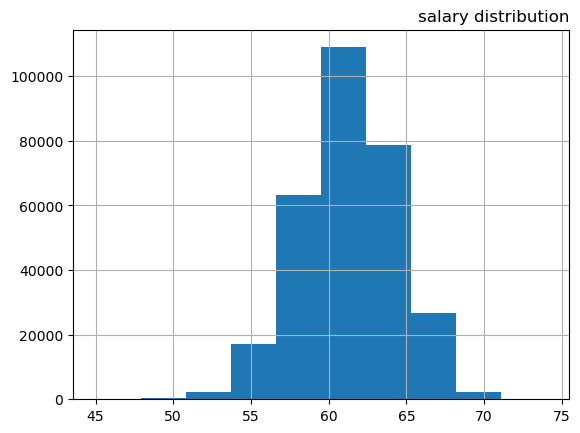

In [9]:
# plotting salary distribution
df['Salary'].hist()
plt.title('salary distribution', loc='right')
plt.show()

max number of employees have average salary which is 59-65k

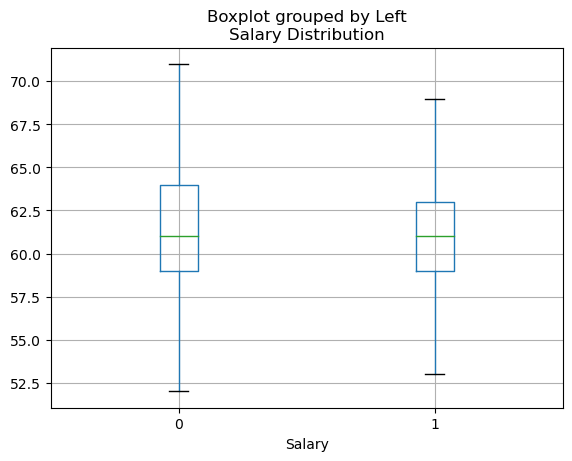

In [10]:
# Salary Distribution with respect to Left

df.boxplot(column='Salary', by='Left', vert=True, showfliers=False)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

### Salary distribution for both cases is almost similar

<Axes: xlabel='SelfReview', ylabel='count'>

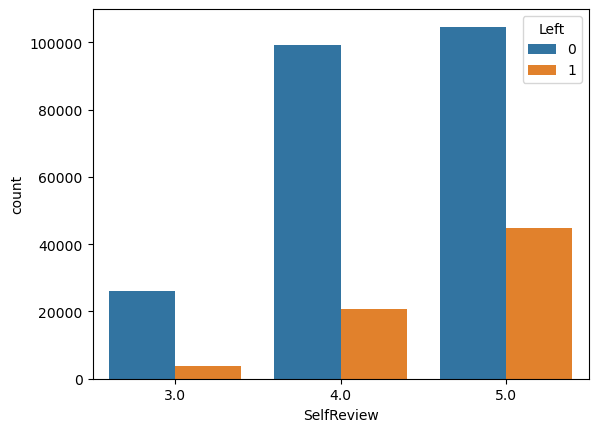

In [11]:
#plot to see relation between SelfReview and Left

sns.countplot(data = df, x = 'SelfReview', hue = 'Left')

increasing leaving when self review value increases

<Axes: xlabel='SupervisorReview', ylabel='count'>

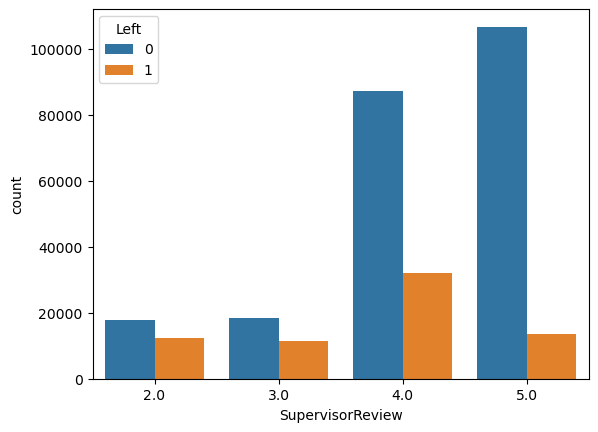

In [12]:
#plot to see relation between SupervisorReview and Left

sns.countplot(data = df, x = 'SupervisorReview', hue = 'Left')

### More than 50% of people have left the Job whose Supervisor have given reviews less than or equal to 3

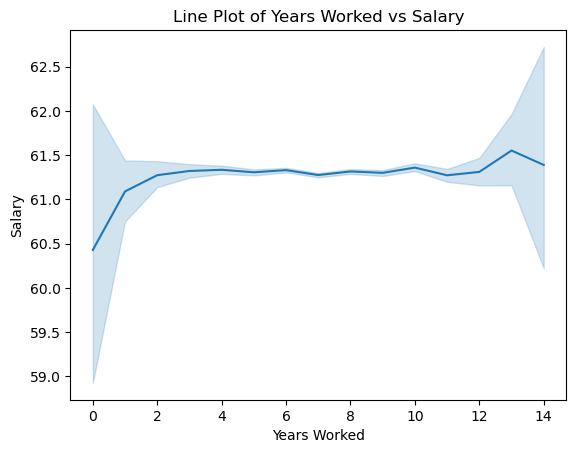

In [13]:
# Analysing trend in Years worked and Salary

sns.lineplot(x='YearsWorked', y='Salary', data=df)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('Line Plot of Years Worked vs Salary')
plt.show()

### Some interesting Insights being observerd
-- People with 0 years of experience have a wide range of salaries, whereas people who worked for around 4 years to 10 years had a salary specifically around ~61.3k.

<Axes: xlabel='Salary', ylabel='count'>

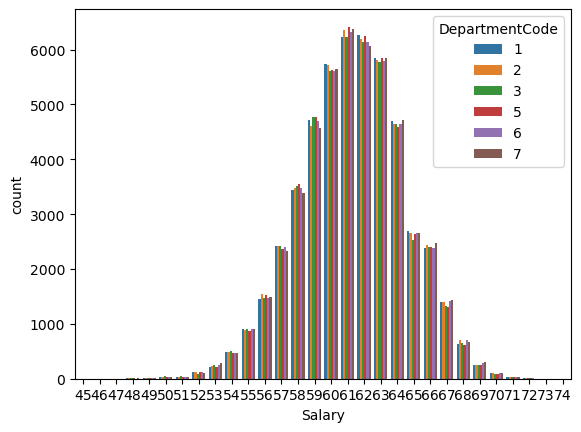

In [14]:
#plot to see distribution of salary among different departments

sns.countplot(data = df, x = 'Salary', hue = 'DepartmentCode')

### Salary distribution among all the departments are almost similar

<Axes: xlabel='DepartmentCode', ylabel='count'>

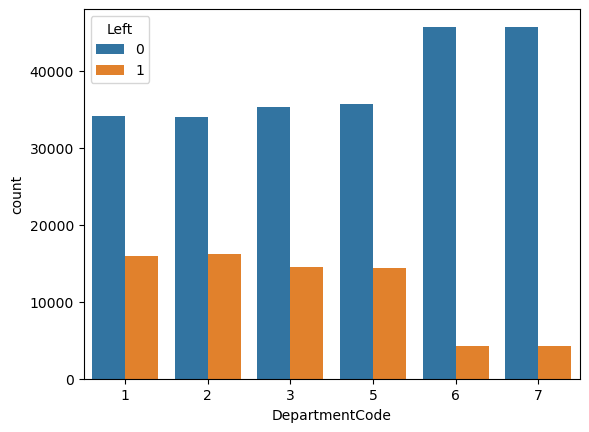

In [15]:
#plot to see relation between DepartmentCode and Left

sns.countplot(data = df, x = 'DepartmentCode', hue = 'Left')

### Less number of people from department 6 & 7 have left the job.

In [16]:
# Creating a New feature 'SalaryRise' and understanding its relationship with our target variable

df['SalaryRise'] = df['Salary'] - df['PreviousSalary']

<Axes: xlabel='SalaryRise', ylabel='count'>

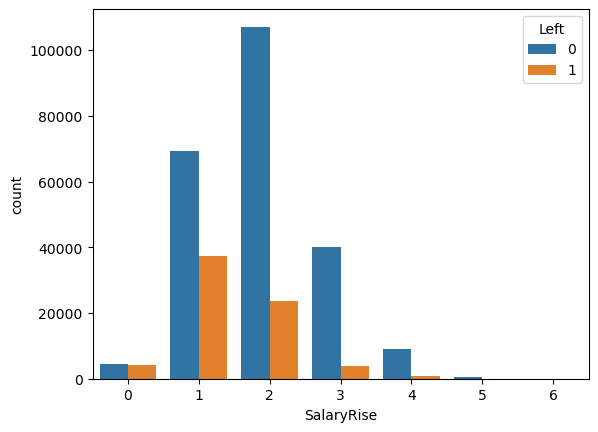

In [17]:
sns.countplot(data = df, x = 'SalaryRise', hue = 'Left')

### Almost all the people have left the job who haven't got salary rise. Also very less people have left the job who got salary rise greater than 2000$

<Axes: xlabel='YearsWorked', ylabel='count'>

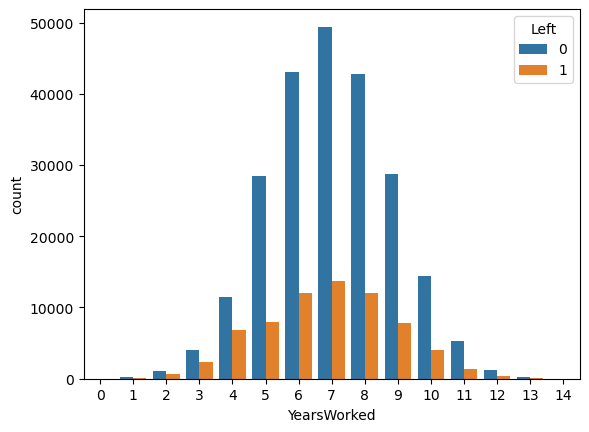

In [18]:
sns.countplot(data = df, x = 'YearsWorked', hue = 'Left')

There is a peak in people leaving when they have gained some experience of 4 yrs or above and similarly choose to stay after they have reached a point after 9 years

C:\Users\deepk\AppData\Local\Temp\ipykernel_12896\3207270257.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


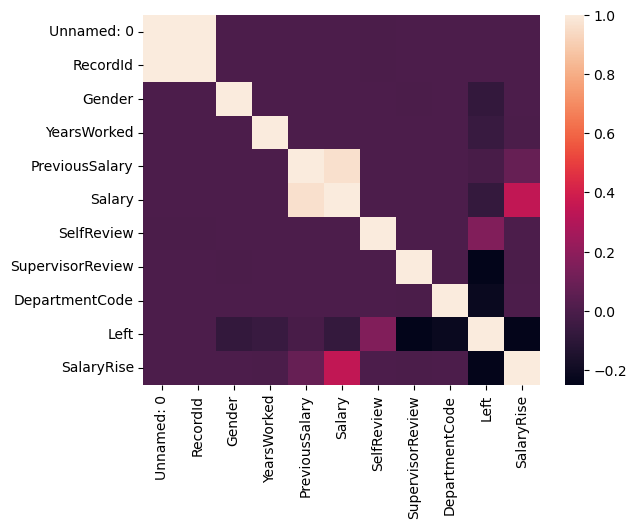

In [19]:
sns.heatmap(df.corr())
plt.show()

# Findings from the EDA:
-- our Dataset is unbalanced 

-- 8 Features can be used for Training the model.

-- among the 8 features 7 are numerical and we are considering Distance as categorical

-- Distance, SelfReviews and SupervisorReview contains some null values

-- Other Insights are already mentioned above. 


# Feature Engineering

-- Imputation

-- Encoding

-- Scaling & Normalization

-- Feature Selection

-- Creating New Composite Feature


#### we will be performing Imputation and normalization during Pipeline creation process
Also we have already created a new feature 'SalaryRise' during our EDA process

In [20]:
df.head()

,Unnamed: 0,RecordId,Gender,Distance,YearsWorked,PreviousSalary,Salary,SelfReview,SupervisorReview,DepartmentCode,Left,SalaryRise
0,0,1002332,1,>30miles,10,63,65,4.0,5.0,2,0,2
1,1,1002333,0,~10miles,7,54,56,4.0,4.0,2,0,2
2,2,1002334,0,<5mile,5,60,61,4.0,4.0,3,0,1
3,3,1002335,0,~15miles,4,59,60,5.0,5.0,7,0,1
4,4,1002336,1,~20miles,6,61,63,5.0,5.0,5,0,2


In [26]:
# Feature Selection
# Not Considering RecordId and Unnamed: 0 as our feature for ML models

Features = ['Gender','Distance','YearsWorked','PreviousSalary','Salary','SelfReview','SupervisorReview','DepartmentCode','SalaryRise']

cat_features = ['Distance']
num_features = ['Gender','YearsWorked','PreviousSalary','Salary','SelfReview','SupervisorReview','DepartmentCode','SalaryRise']

# Pipeline Creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('num pipeline', num_pipeline, num_features),
                                                      ('cat pipeline', cat_pipeline, cat_features)])

processing_pipeline

ColumnTransformer(transformers=[('num pipeline',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Gender', 'YearsWorked', 'PreviousSalary',
                                  'Salary', 'SelfReview', 'SupervisorReview',
                                  'DepartmentCode', 'SalaryRise']),
                                ('cat pipeline',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Distance'])])

## Cross-Validation: Logistic Regression & Random Forest 

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Defining the models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

logistic_regression_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', logistic_regression)
])

random_forest_pipeline = Pipeline([
    ('preprocessing', processing_pipeline),
    ('classifier', random_forest)
])

X = df[['Gender','Distance','YearsWorked','PreviousSalary','Salary','SelfReview','SupervisorReview','DepartmentCode','SalaryRise']]
y = df['Left']
# Perform cross-validation
logistic_regression_cv_scores = cross_val_score(logistic_regression_pipeline, X, y, cv=5, scoring='precision')
random_forest_cv_scores = cross_val_score(random_forest_pipeline, X, y, cv=5, scoring='precision')

# Print the mean cross-validation scores
print("Logistic Regression CV Scores:", logistic_regression_cv_scores.mean())
print("Random Forest CV Scores:", random_forest_cv_scores.mean())

Logistic Regression CV Scores: 0.6587549169784245
Random Forest CV Scores: 0.6877049838154768


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df[['Gender','Distance','YearsWorked','PreviousSalary','Salary','SelfReview','SupervisorReview','DepartmentCode','SalaryRise']]
y = df['Left']

# Creating a balanced sample with equal cases of the target variable
sample_size = min(df['Left'].value_counts())
balanced_df = df.groupby('Left').apply(lambda x: x.sample(sample_size)).reset_index(drop=True)

# Splitting the balanced sample into features and target variable
X_balanced = balanced_df[['Gender','Distance','YearsWorked','PreviousSalary','Salary','SelfReview','SupervisorReview','DepartmentCode','SalaryRise']]
y_balanced = balanced_df['Left']

# Splitting the balanced sample into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


# Logistic Regression
logreg_pipeline = Pipeline([('preprocessing', processing_pipeline),
                             ('logreg', LogisticRegression())])

# Random Forest
rf_pipeline = Pipeline([('preprocessing', processing_pipeline),
                        ('rf', RandomForestClassifier())])

# Perform cross-validation
logreg_cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores (Logistic Regression):", logreg_cv_scores)
print("Mean CV Score (Logistic Regression):", logreg_cv_scores.mean())

print("Cross-Validation Scores (Random Forest):", rf_cv_scores)
print("Mean CV Score (Random Forest):", rf_cv_scores.mean())


Cross-Validation Scores (Logistic Regression): [0.76972502 0.76693925 0.77030913 0.76994968 0.76693925]
Mean CV Score (Logistic Regression): 0.7687724658519051
Cross-Validation Scores (Random Forest): [0.89962257 0.90186916 0.90106039 0.90007189 0.89944285]
Mean CV Score (Random Forest): 0.900413371675054


## Model Evaluation: Logistic Regression & Random Forest

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Make predictions using cross-validated logistic regression and random forest models
logistic_regression_cv_preds = cross_val_predict(logistic_regression_pipeline, X, y, cv=5)
random_forest_cv_preds = cross_val_predict(random_forest_pipeline, X, y, cv=5)

logistic_regression_accuracy = accuracy_score(y, logistic_regression_cv_preds)
logistic_regression_precision = precision_score(y, logistic_regression_cv_preds)
logistic_regression_recall = recall_score(y, logistic_regression_cv_preds)
logistic_regression_f1 = f1_score(y, logistic_regression_cv_preds)

# Calculate evaluation metrics for random forest
random_forest_accuracy = accuracy_score(y, random_forest_cv_preds)
random_forest_precision = precision_score(y, random_forest_cv_preds)
random_forest_recall = recall_score(y, random_forest_cv_preds)
random_forest_f1 = f1_score(y, random_forest_cv_preds)

# Print evaluation metrics
print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", logistic_regression_accuracy)
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)
print()

print("Random Forest Evaluation Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)

Logistic Regression Evaluation Metrics:
Accuracy: 0.8153666666666667
Precision: 0.658744394618834
Recall: 0.4224299065420561
F1 Score: 0.5147612790188348

Random Forest Evaluation Metrics:
Accuracy: 0.86519
Precision: 0.6875668569808354
Recall: 0.76705966930266
F1 Score: 0.7251411911024119


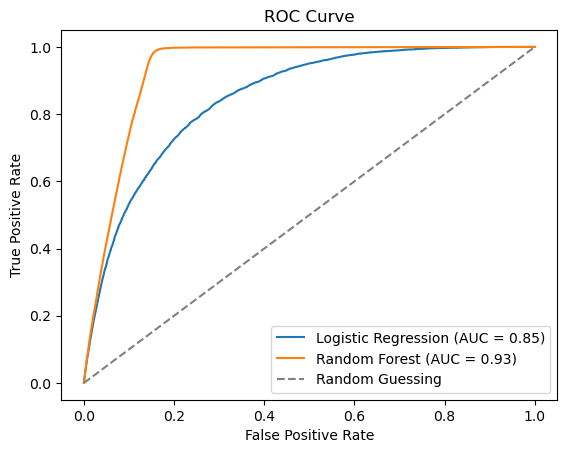

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate predicted probabilities for logistic regression and random forest models
logistic_regression_cv_probs = cross_val_predict(logistic_regression_pipeline, X, y, cv=5, method='predict_proba')[:, 1]
random_forest_cv_probs = cross_val_predict(random_forest_pipeline, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC for logistic regression
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y, logistic_regression_cv_probs)
logistic_regression_auc = roc_auc_score(y, logistic_regression_cv_probs)

# Calculate ROC curve and AUC for random forest
random_forest_fpr, random_forest_tpr, _ = roc_curve(y, random_forest_cv_probs)
random_forest_auc = roc_auc_score(y, random_forest_cv_probs)

# Plot ROC curve for logistic regression
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label='Logistic Regression (AUC = %0.2f)' % logistic_regression_auc)

# Plot ROC curve for random forest
plt.plot(random_forest_fpr, random_forest_tpr, label='Random Forest (AUC = %0.2f)' % random_forest_auc)

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### This indicates that the model has excellent discriminative power, with a high probability of correctly ranking a randomly chosen positive instance higher than a randomly chosen negative instance approximately 93% of the time

## Hyper-Parameter tuning: Logistic regression & Random Forest

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
logreg_param_grid = {'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0],
                     'logreg__penalty': ['l2']}

# Perform grid search for logistic regression
logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='accuracy', cv=5)
logreg_grid_search.fit(X_train, y_train)

# Get the best parameters for logistic regression
best_logreg_params = logreg_grid_search.best_params_

# Define the parameter grid for random forest
rf_param_grid = {'rf__n_estimators': [100, 200],
                 'rf__max_depth': [None, 5,10, 20]}

# Perform grid search for random forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters for random forest
best_rf_params = rf_grid_search.best_params_

# Implement logistic regression and random forest models with best parameters
best_logreg_model = logreg_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate logistic regression model
logreg_accuracy = accuracy_score(y_test, best_logreg_model.predict(X_test))
logreg_precision = precision_score(y_test, best_logreg_model.predict(X_test))
logreg_recall = recall_score(y_test, best_logreg_model.predict(X_test))
logreg_f1 = f1_score(y_test, best_logreg_model.predict(X_test))

# Evaluate random forest model
rf_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
rf_precision = precision_score(y_test, best_rf_model.predict(X_test))
rf_recall = recall_score(y_test, best_rf_model.predict(X_test))
rf_f1 = f1_score(y_test, best_rf_model.predict(X_test))

# Print evaluation metrics
print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)
print()

print("Random Forest Evaluation Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Logistic Regression Evaluation Metrics:
Accuracy: 0.7721063982746226
Precision: 0.764075822704531
Recall: 0.7837368991687749
F1 Score: 0.7737814886177121

Random Forest Evaluation Metrics:
Accuracy: 0.9217109992810928
Precision: 0.8654461094739482
Recall: 0.9976870256595591
F1 Score: 0.9268734891216761


Logistic Regression:

C: The inverse of regularization strength. Smaller values specify stronger regularization. By testing a range of values (0.001, 0.01, 0.1, 1.0, 10.0), we can explore both strong and weak regularization effects on the model.


Penalty: Specifies the norm used in the penalization. Here, 'l2' indicates the L2 norm, which penalizes the squared magnitude of coefficients.

Random Forest:

n_estimators:By testing [100, 200], we explore the effect of different numbers of trees on the model's performance.

max_depth: The maximum depth of the trees. Testing [None, 5, 10, 20] allows us to assess the impact of tree depth on model complexity and overfitting.

# Linear Regression and Decision tree

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression

X = df[['Gender','Distance','YearsWorked','PreviousSalary','Salary','SelfReview','SupervisorReview','DepartmentCode','SalaryRise']]
y = df['Left']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=120)

print('Training set shape', X_train2.shape, y_train2.shape)
print('Test set shape', X_test2.shape, y_test2.shape)

Training set shape (240000, 9) (240000,)
Test set shape (60000, 9) (60000,)


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


dtree_pipeline = Pipeline([
    ('data_preprocessing', processing_pipeline),
    ('classifier', DecisionTreeClassifier(criterion='gini', random_state=1))
])

linreg_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('lm', LinearRegression())]
    )

# Performing cross-validation
linreg_cv_scores = cross_val_score(linreg_pipeline, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
dtree_cv_scores = cross_val_score(dtree_pipeline, X_train2, y_train2, cv=5, scoring='accuracy')

# Displaying cross-validation scores
print("Cross-Validation Scores (Linear Regression):", linreg_cv_scores)
print("Mean CV Score (Linear Regression):", linreg_cv_scores.mean())

print("Cross-Validation Scores (decision Tree):", dtree_cv_scores)
print("Mean CV Score (Decision tree):", dtree_cv_scores.mean())

Cross-Validation Scores (Linear Regression): [-0.13375588 -0.13230471 -0.13215451 -0.13198623 -0.13186603]
Mean CV Score (Linear Regression): -0.1324134720815487
Cross-Validation Scores (decision Tree): [0.8535625  0.8509375  0.85158333 0.852375   0.852     ]
Mean CV Score (Decision tree): 0.8520916666666667


## Model Evaluation: Linear Regression and Decision Tree

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the models on the training data
dtree_pipeline.fit(X_train2, y_train2)

# Make predictions
dtree_preds = dtree_pipeline.predict(X_test2)

# Calculate evaluation metrics for Decision Tree
dtree_accuracy = accuracy_score(y_test2, dtree_preds)
dtree_precision = precision_score(y_test2, dtree_preds)
dtree_recall = recall_score(y_test2, dtree_preds)
dtree_f1 = f1_score(y_test2, dtree_preds)

# Print evaluation metrics for Decision Tree
print("Decision Tree Evaluation Metrics:")
print("Accuracy:", dtree_accuracy)
print("Precision:", dtree_precision)
print("Recall:", dtree_recall)
print("F1 Score:", dtree_f1)

Decision Tree Evaluation Metrics:
Accuracy: 0.8529
Precision: 0.6874907694579826
Recall: 0.6695914844649021
F1 Score: 0.6784230853311958


In [49]:
from sklearn.metrics import mean_squared_error

y_test_pred=linreg_pipeline.predict(X_test2)
mse = mean_squared_error(y_test2, y_test_pred)
print('mse: ',mse)

rmse = np.sqrt(mse)
print('rmse: ',rmse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print('r2_score: ',r2)

mse:  0.13209630010890808
rmse:  0.3634505469921707
r2_score:  0.25802349336032426


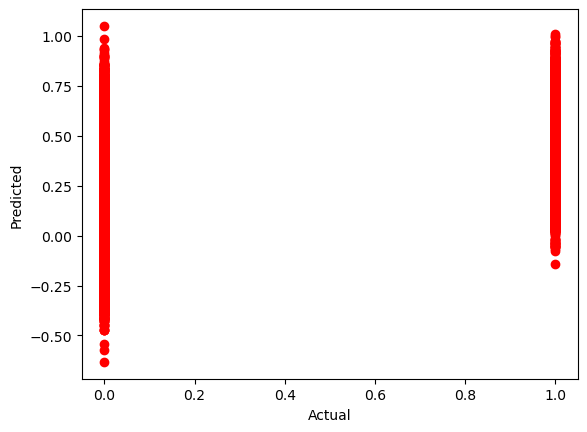

In [50]:
# plotting test and predictions

plt.plot(y_test2, y_test_pred, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

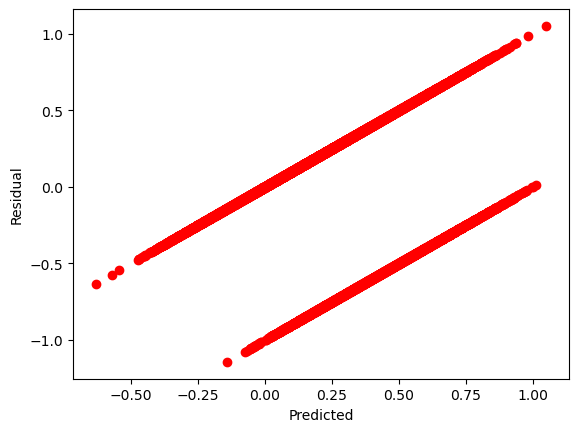

In [51]:
# plotting residual plot

plt.plot(y_test_pred, y_test_pred - y_test2, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

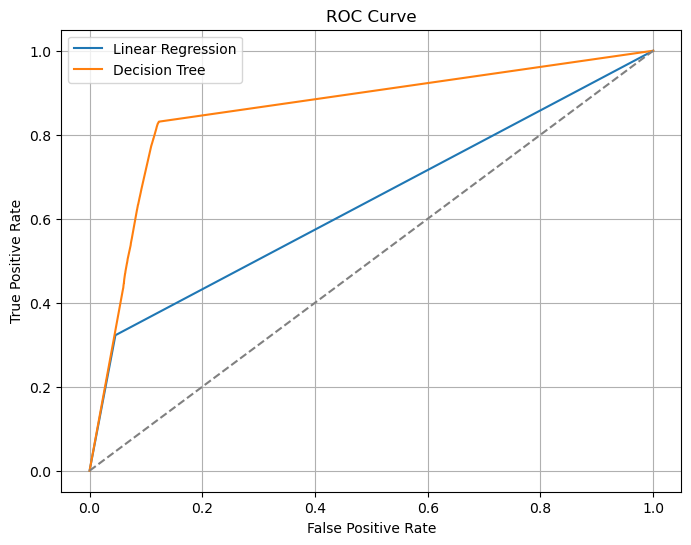

In [53]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# probabilities
# Calculate the predicted values from linear regression
linreg_preds = linreg_pipeline.predict(X_test2)

# Define a threshold for classifying positive and negative instances
threshold = 0.5

# Convert predicted values to binary predictions based on the threshold
linreg_preds_binary = (linreg_preds >= threshold).astype(int)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ROC curve
fpr_linreg, tpr_linreg, _ = roc_curve(y_test2_binary, linreg_preds_binary)

# For Decision Tree
dtree_probs = dtree_pipeline.predict_proba(X_test2)[:, 1]

# ROC curve
# For Decision Tree
fpr_dtree, tpr_dtree, _ = roc_curve(y_test2_binary, dtree_probs)

plt.figure(figsize=(8, 6))

# Plot ROC curve for Linear Regression
plt.plot(fpr_linreg, tpr_linreg, label='Linear Regression')

# Plot ROC curve for Decision Tree
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for linear regression
linreg_param_grid = {
    'lm__fit_intercept': [True, False],
}
# Define hyperparameters for decision tree
dtree_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search for linear regression
linreg_grid_search = GridSearchCV(linreg_pipeline, linreg_param_grid, cv=5, scoring='neg_mean_squared_error')
linreg_grid_search.fit(X_train2, y_train2)
# Perform grid search Decision Tree
dtree_grid_search = GridSearchCV(dtree_pipeline, dtree_param_grid, cv=5, scoring='accuracy')
dtree_grid_search.fit(X_train2, y_train2)


# Get the best parameters
best_linreg_params = linreg_grid_search.best_params_
best_dtree_params = dtree_grid_search.best_params_

# Implement linear regression model with best parameters
best_linreg_model = linreg_grid_search.best_estimator_
# Implement decision tree model with best parameters
best_dtree_model = dtree_grid_search.best_estimator_

# Print the best parameters
print("Best Parameters for Linear Regression:", best_linreg_params)
print("Best Parameters for Decision Tree:", best_dtree_params)

Best Parameters for Linear Regression: {'lm__fit_intercept': True}
Best Parameters for Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions with the best linear regression model
linreg_preds = best_linreg_model.predict(X_test2)

# Calculate mean squared error
mse = mean_squared_error(y_test2, linreg_preds)

# Calculate R-squared value
r_squared = r2_score(y_test2, linreg_preds)

# Print the evaluation metrics
print("Mean Squared Error (MSE) with Best Linear Regression Parameters:", mse)
print("R-squared with Best Linear Regression Parameters:", r_squared)

Mean Squared Error (MSE) with Best Linear Regression Parameters: 0.13209630010890808
R-squared with Best Linear Regression Parameters: 0.25802349336032426


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions with the best decision tree model
dtree_preds = best_dtree_model.predict(X_test2)

# Calculate evaluation metrics
dtree_accuracy = accuracy_score(y_test2, dtree_preds)
dtree_precision = precision_score(y_test2, dtree_preds)
dtree_recall = recall_score(y_test2, dtree_preds)
dtree_f1 = f1_score(y_test2, dtree_preds)

# Print the evaluation metrics
print("Accuracy with Best Decision Tree Parameters:", dtree_accuracy)
print("Precision with Best Decision Tree Parameters:", dtree_precision)
print("Recall with Best Decision Tree Parameters:", dtree_recall)
print("F1 Score with Best Decision Tree Parameters:", dtree_f1)

Accuracy with Best Decision Tree Parameters: 0.8801833333333333
Precision with Best Decision Tree Parameters: 0.6830997436876262
Recall with Best Decision Tree Parameters: 0.900891829689298
F1 Score with Best Decision Tree Parameters: 0.7770230451909059


Linear Regression:

fit_intercept: Whether to calculate the intercept for this model. By testing both True and False, we evaluate whether including an intercept improves model performance.


Decision Tree:

criterion: The function to measure the quality of a split. Testing both 'gini' and 'entropy' allows us to compare the performance of these different impurity measures.

max_depth: Similar to random forest, testing [None, 10, 20, 30] explores the effect of tree depth on model complexity.

min_samples_split: The minimum number of samples required to split an internal node. Testing [2, 5, 10] explores the impact of different splitting criteria on tree structure.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Testing [1, 2, 4] evaluates the effect of different leaf sizes on model generalization. 

# Conclusion & Comparision

## Logistic regression Evaluation Metrics after hyperparameter tuning

Accuracy: 0.7721063982746226

indicating that it correctly classified approximately 77.21% of the instances

Precision: 0.764075822704531

it predicted correct positive instances correct 76.41% of the time.

Recall: 0.7837368991687749

it successfully captured around 78.37% of the actual positive instances.

F1 Score: 0.7737814886177121


## Ramdom forest Evaluation Metrics after hyperparameter tuning

Accuracy: 0.9217109992810928

indicating superior overall performance compared to other models.

Precision: 0.8654461094739482

indicates that when model predicted positive instances, it was correct approximately 86.54% of the time

Recall: 0.9976870256595591

indicates that model almost perfectly captured 99.77% of the actual positive instances.

F1 Score: 0.9268734891216761


## Decision tree Evaluation metrics after hyperparameter tuning

Accuracy: 0.8801833333333333

indicating good overall performance but lower than Random Forest.

Precision: 0.6830997436876262

Recall : 0.900891829689298

indicates that model captured around 90% of positive instances.

F1 Score: 0.7770230451909059

## Linear regression Evaluation Metrics after hyperparameter tuning

Mean Squared Error (MSE) with Best Linear Regression Parameters: 0.13209630010890808

Achieved an MSE of 0.1321, indicating the average squared difference between predicted and actual values.

R-squared with Best Linear Regression Parameters: 0.25802349336032426

The R-squared value of 0.2580 suggests that around 25.80% of the variance in the target variable is explained by the model, indicating modest performance.

# Project Outcomes

Logistic Regression and Decision Tree performed reasonably well but had lower scores compared to Random Forest.


Linear Regression, being a regression model, was evaluated using different metrics (MSE and R-squared) and showed moderate performance with a low R-squared value.


Random Forest's ensemble approach, combining multiple decision trees, likely contributed to its superior performance by reducing overfitting and capturing complex patterns in the data more effectively. In contrast, Logistic Regression, Decision Tree, and Linear Regression may have struggled with capturing the intricacies of the dataset adequately.